In [13]:
import numpy as np
from rdkit import Chem
from massspecgym.utils import visualize_MSn_tree
from massspecgym.data.transforms import MolFingerprinter
from massspecgym.data.datasets import MSnDataset
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
fingerprinter = MolFingerprinter()
msn_dataset = MSnDataset(pth="../../data/MSn/debug.mgf", mol_transform=MolFingerprinter.from_smiles)

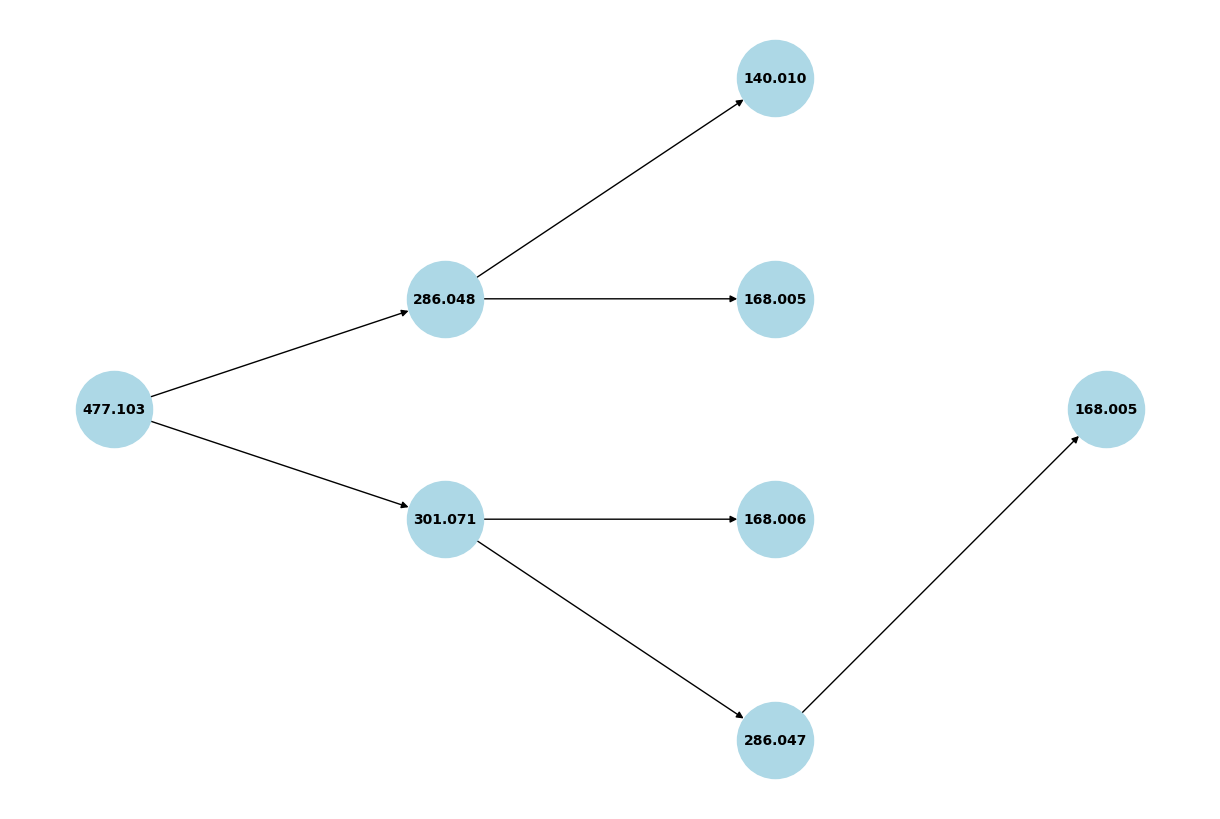

In [15]:
visualize_MSn_tree(msn_dataset.trees[28])

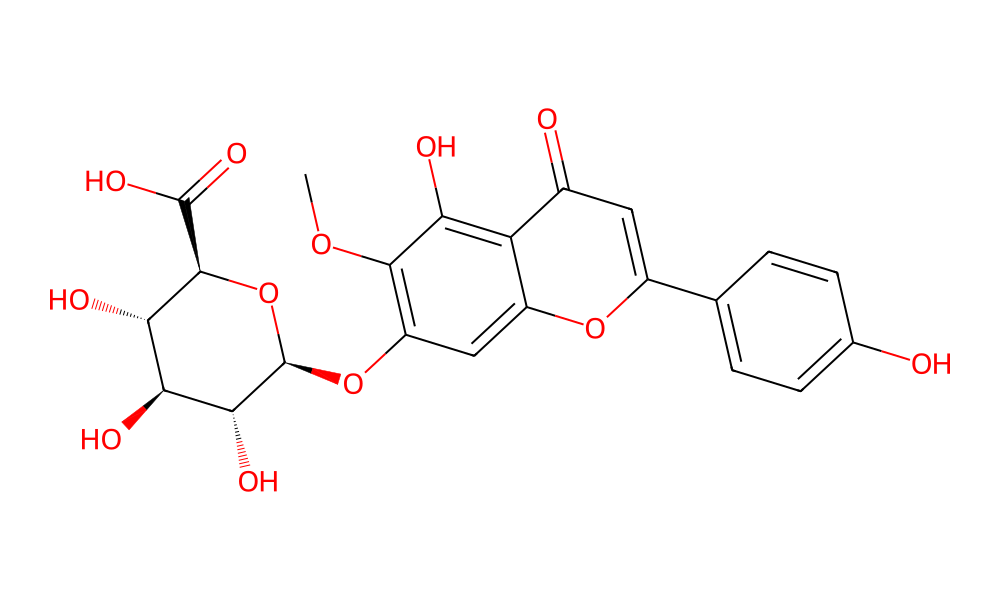

In [16]:
mol = Chem.MolFromSmiles(msn_dataset.smiles[28])
Chem.rdDepictor.Compute2DCoords(mol)
img = Chem.Draw.MolToImage(mol, size=(1000, 600))
img

2
3
[477.103668212891, 301.07080078125]
4
[477.103668212891, 301.07080078125, 286.047424316406]
5
[477.103668212891, 301.07080078125, 286.047424316406, 168.005447387695]
4
[477.103668212891, 301.07080078125, 168.005569458008]
3
[477.103668212891, 286.047973632813]
4
[477.103668212891, 286.047973632813, 168.005447387695]
4
[477.103668212891, 286.047973632813, 140.010498046875]


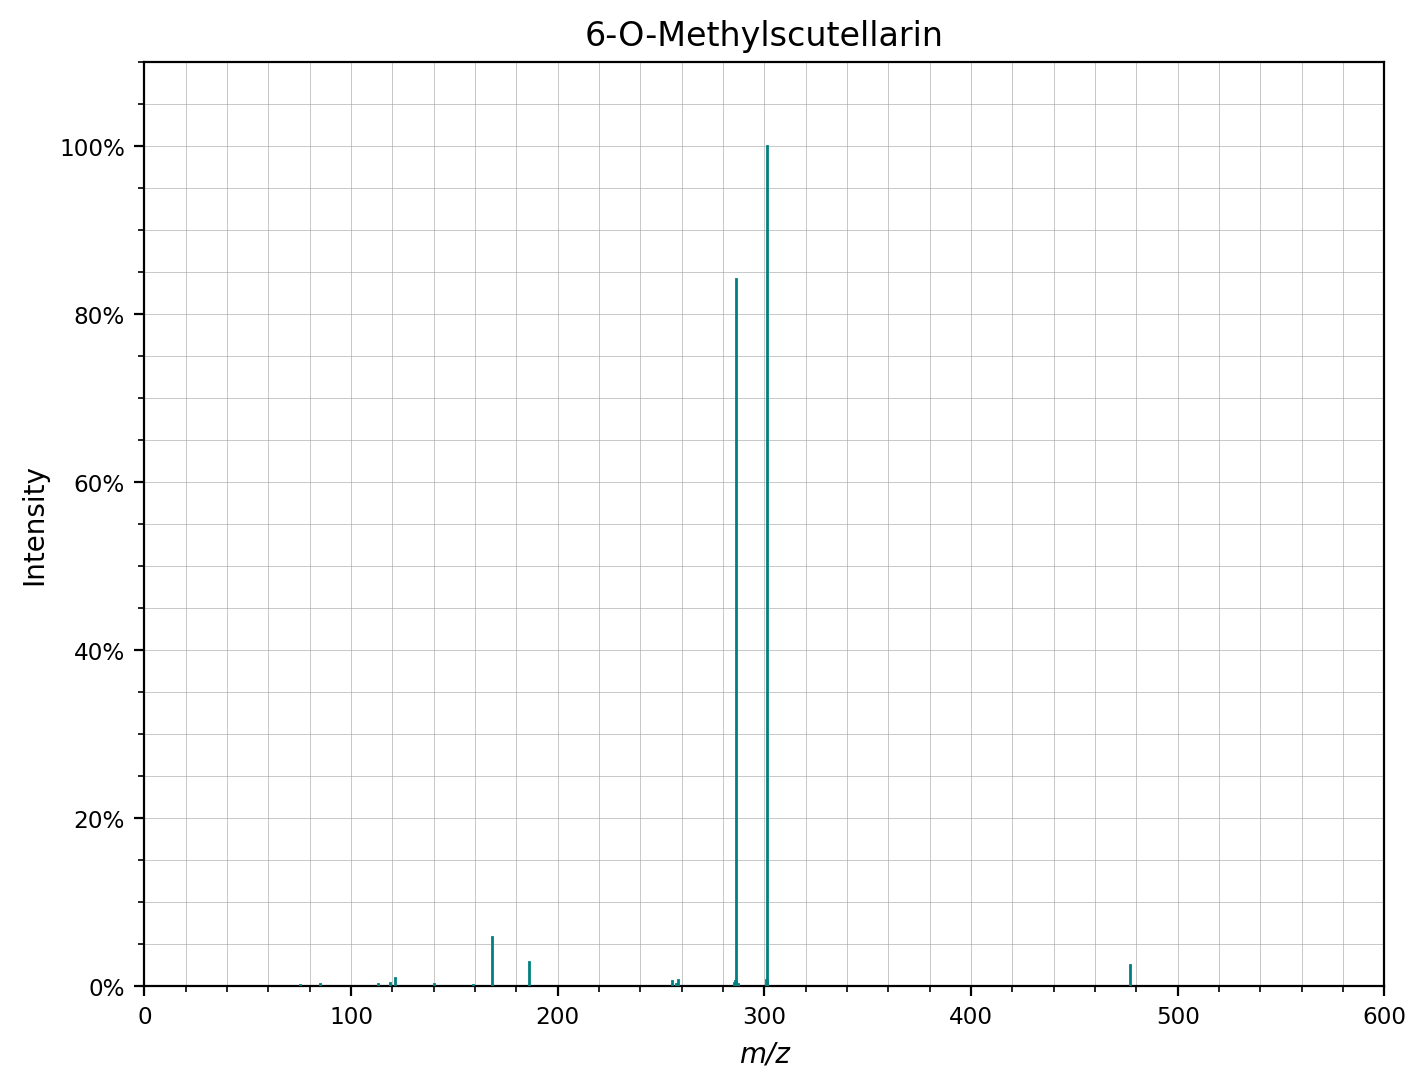

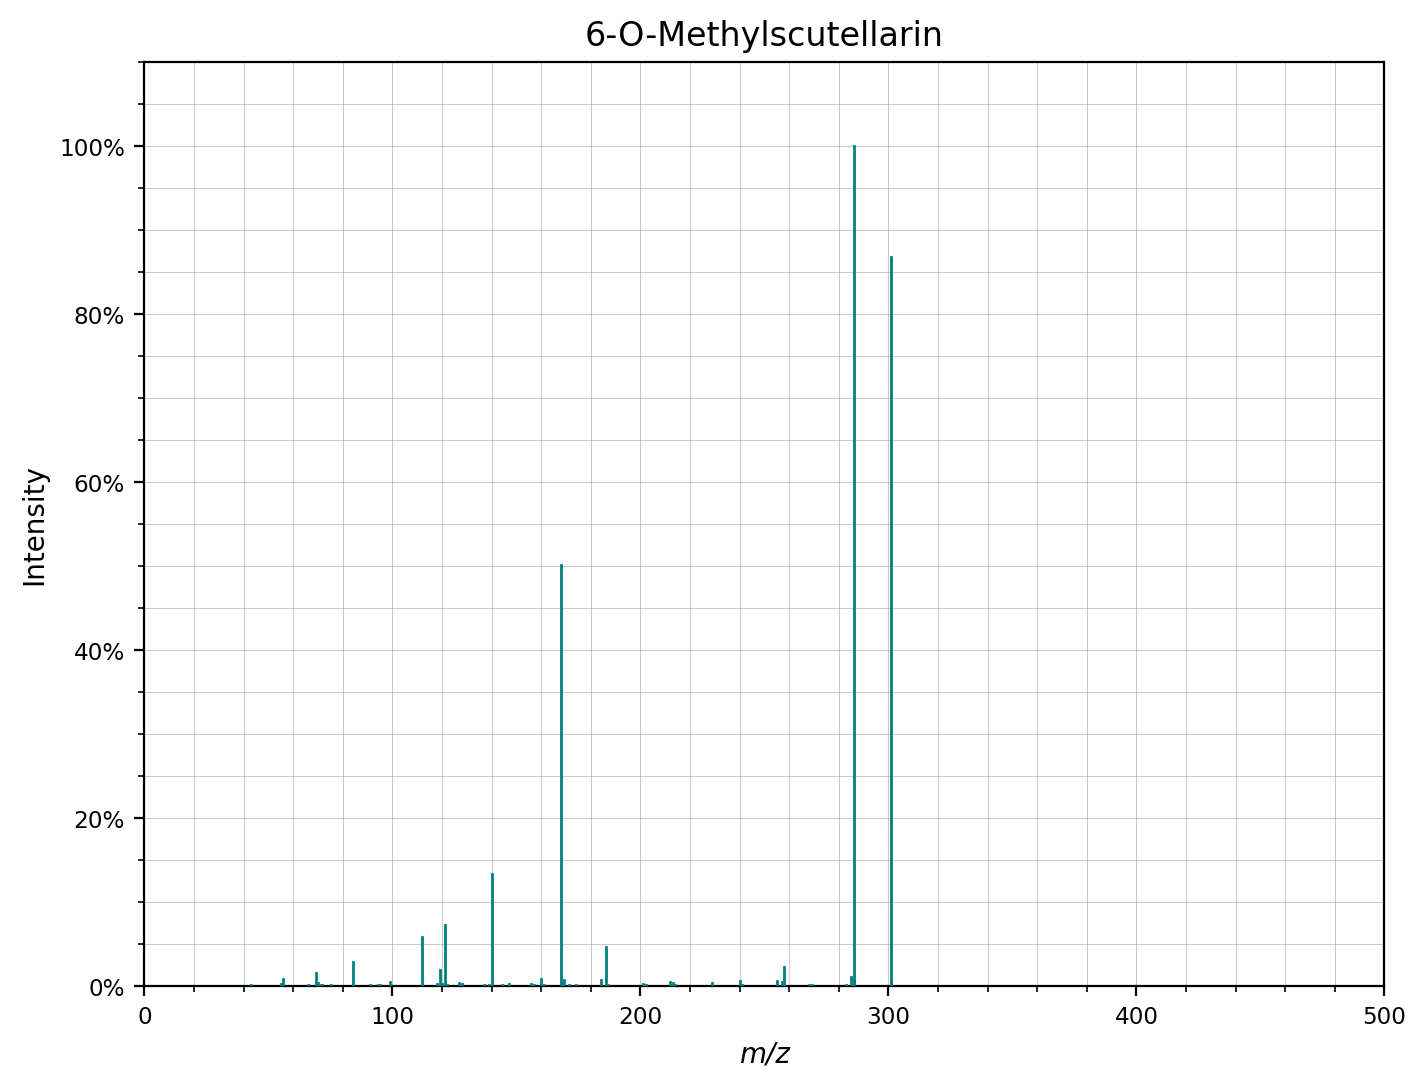

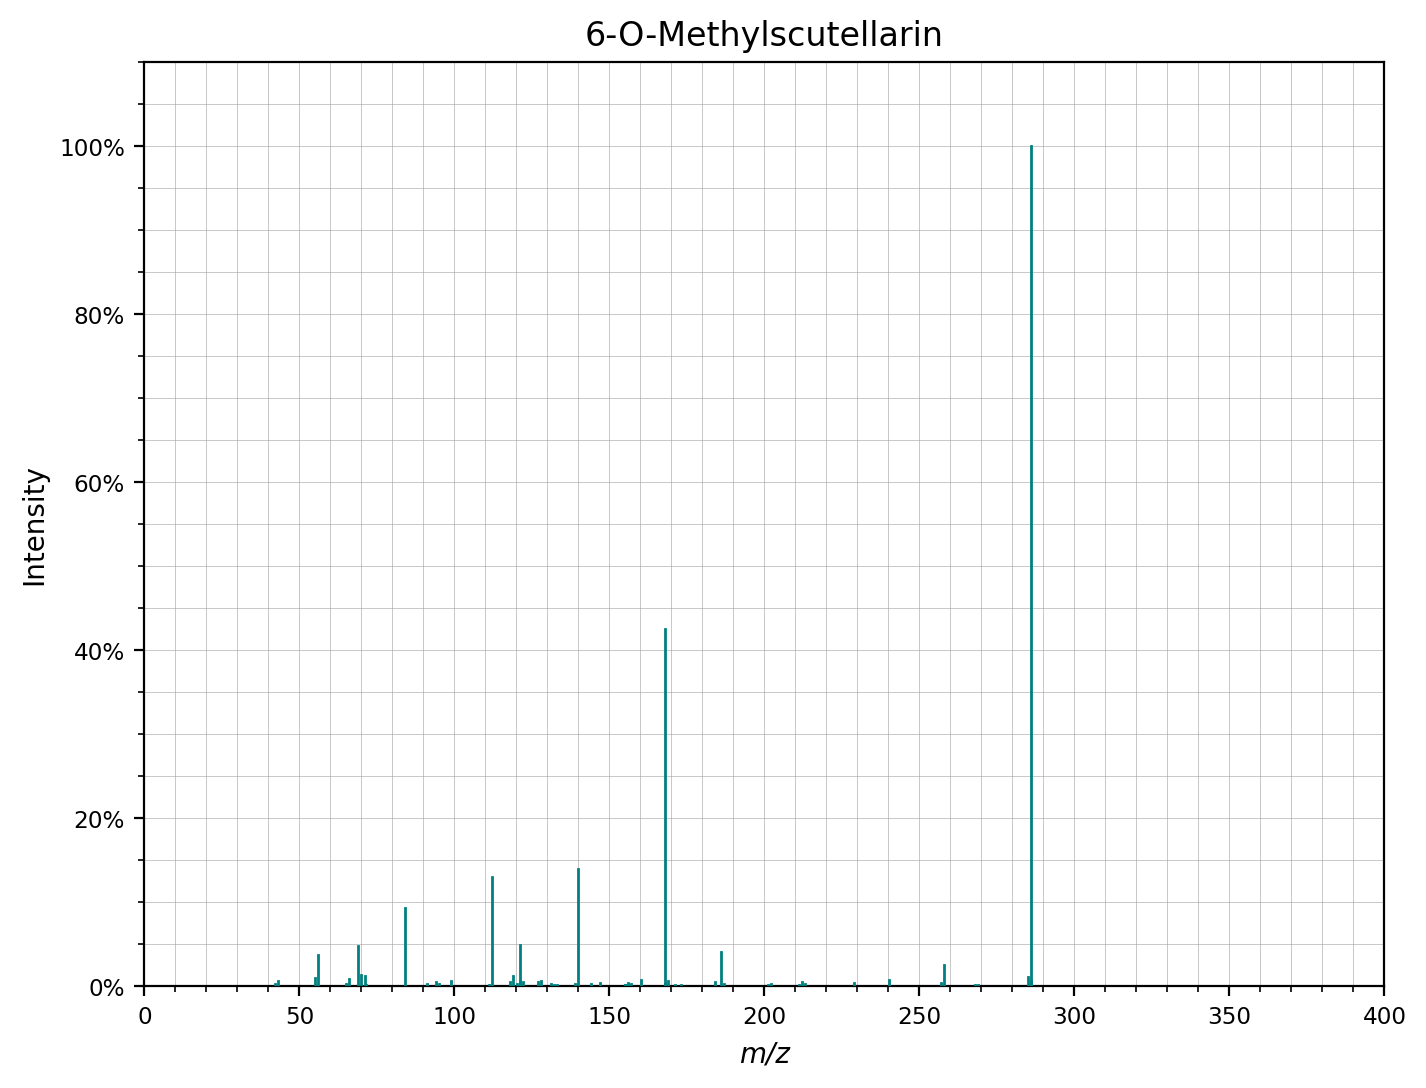

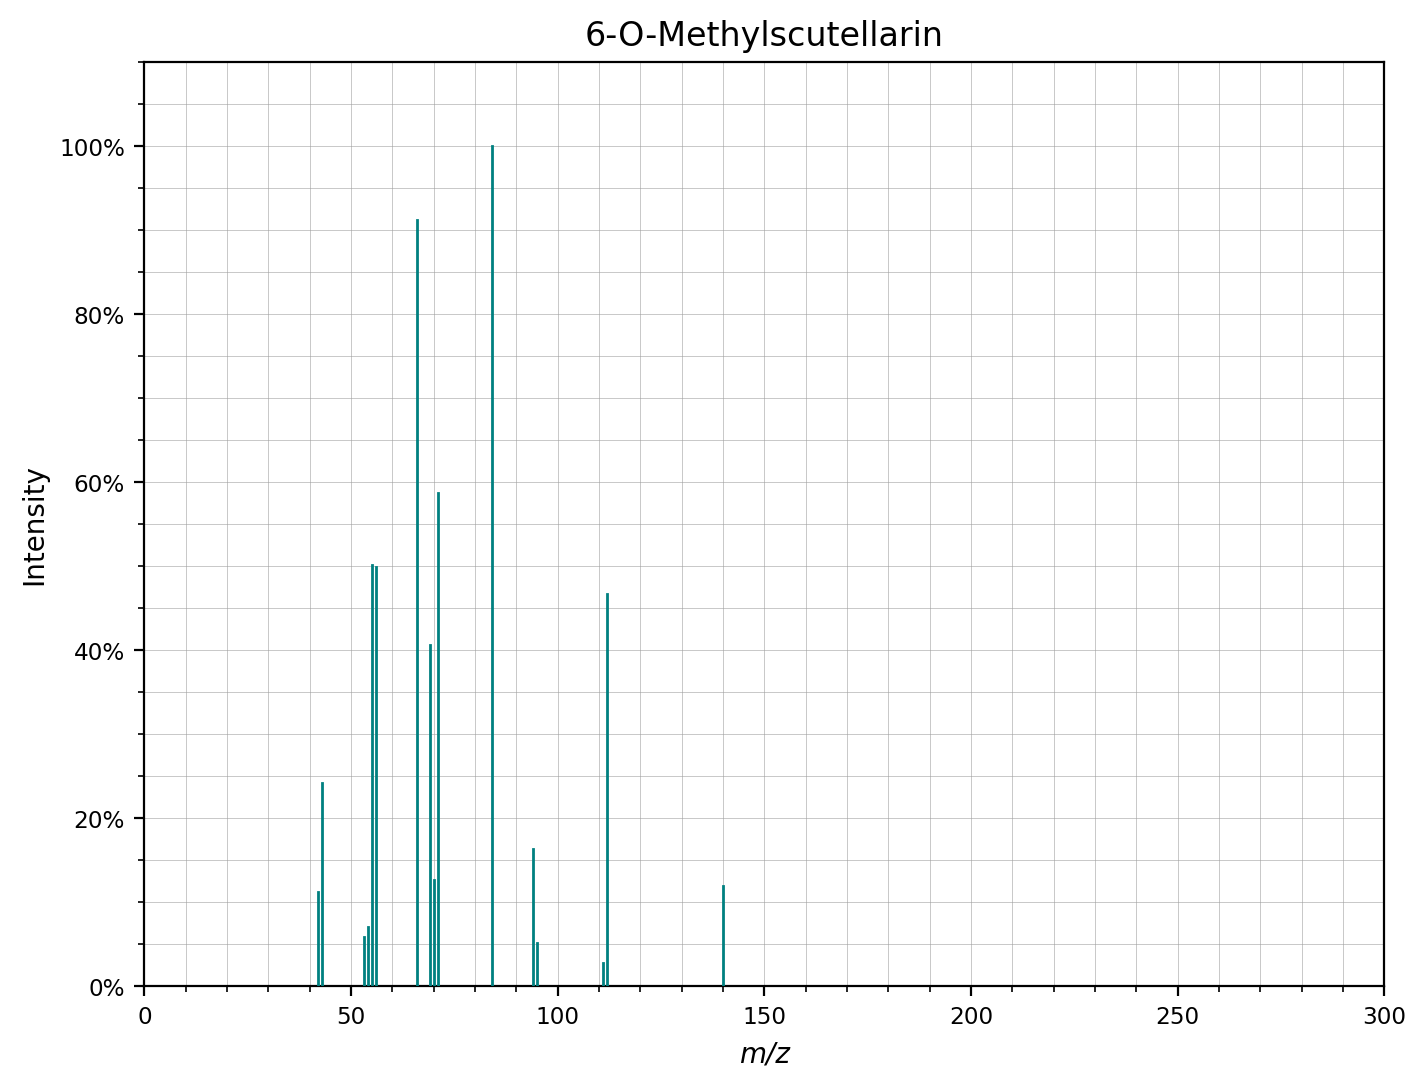

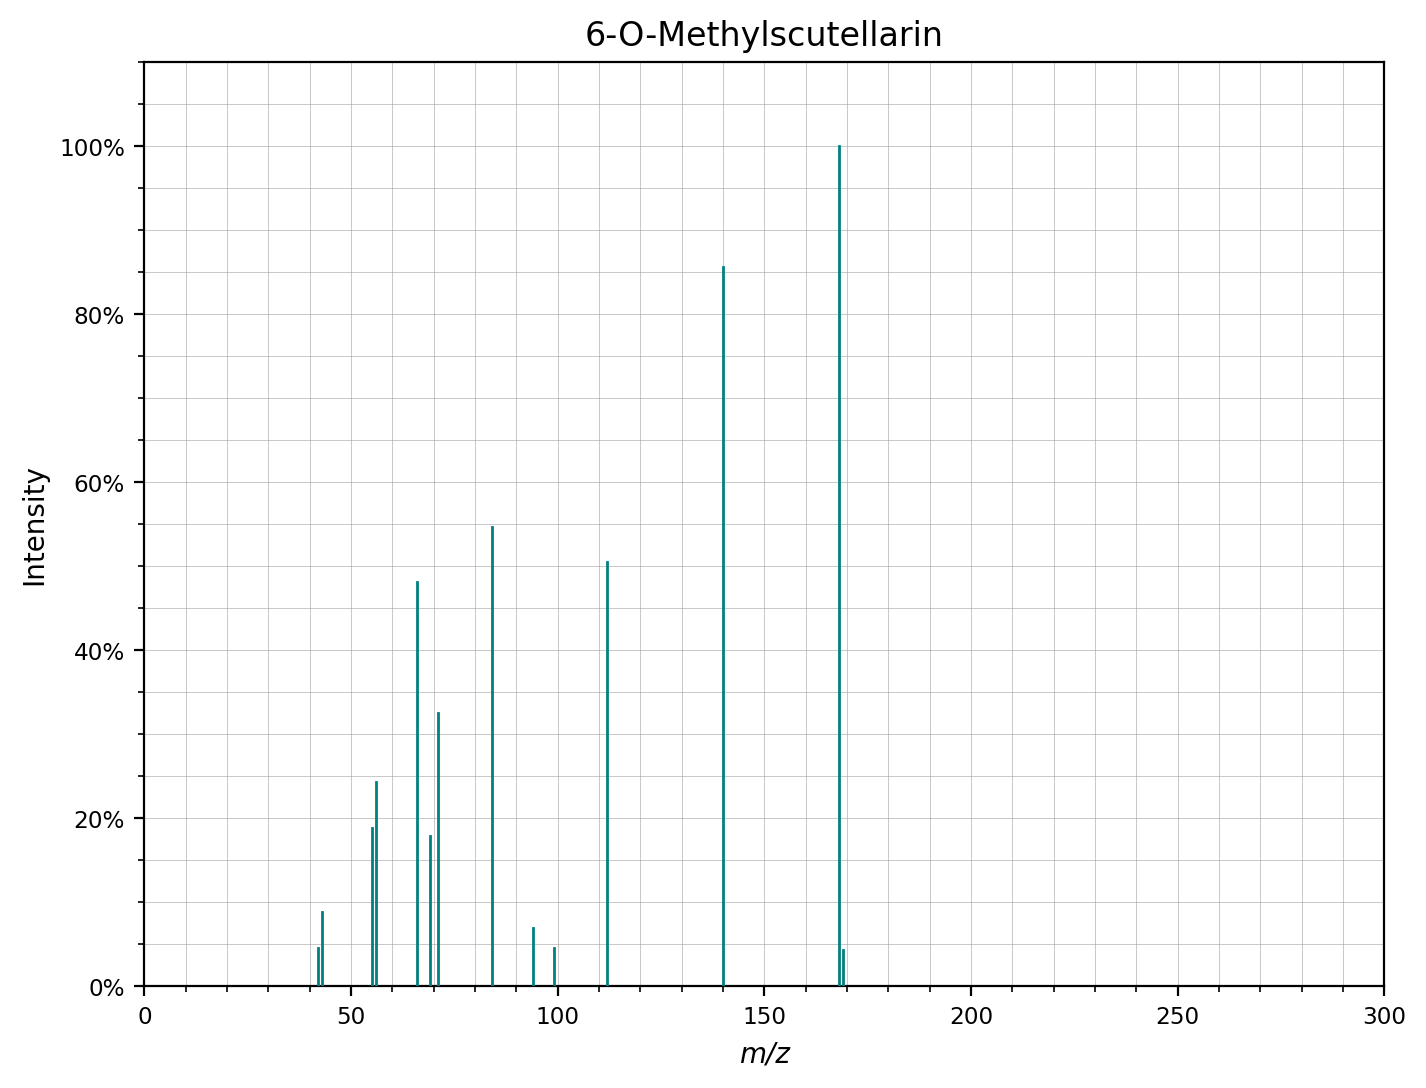

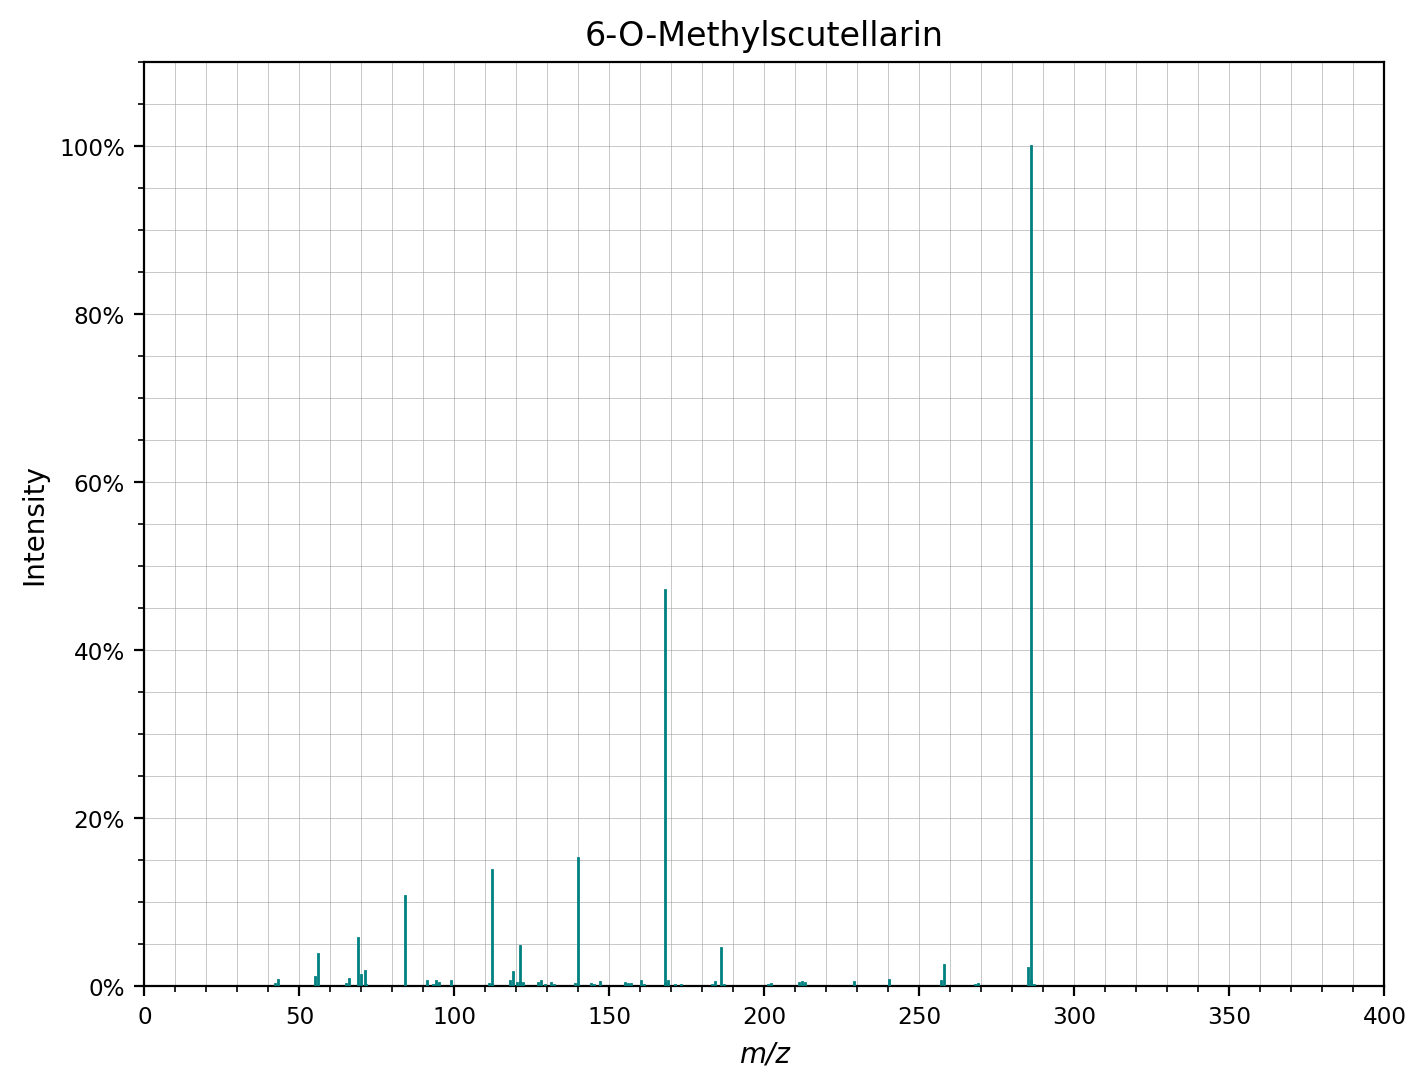

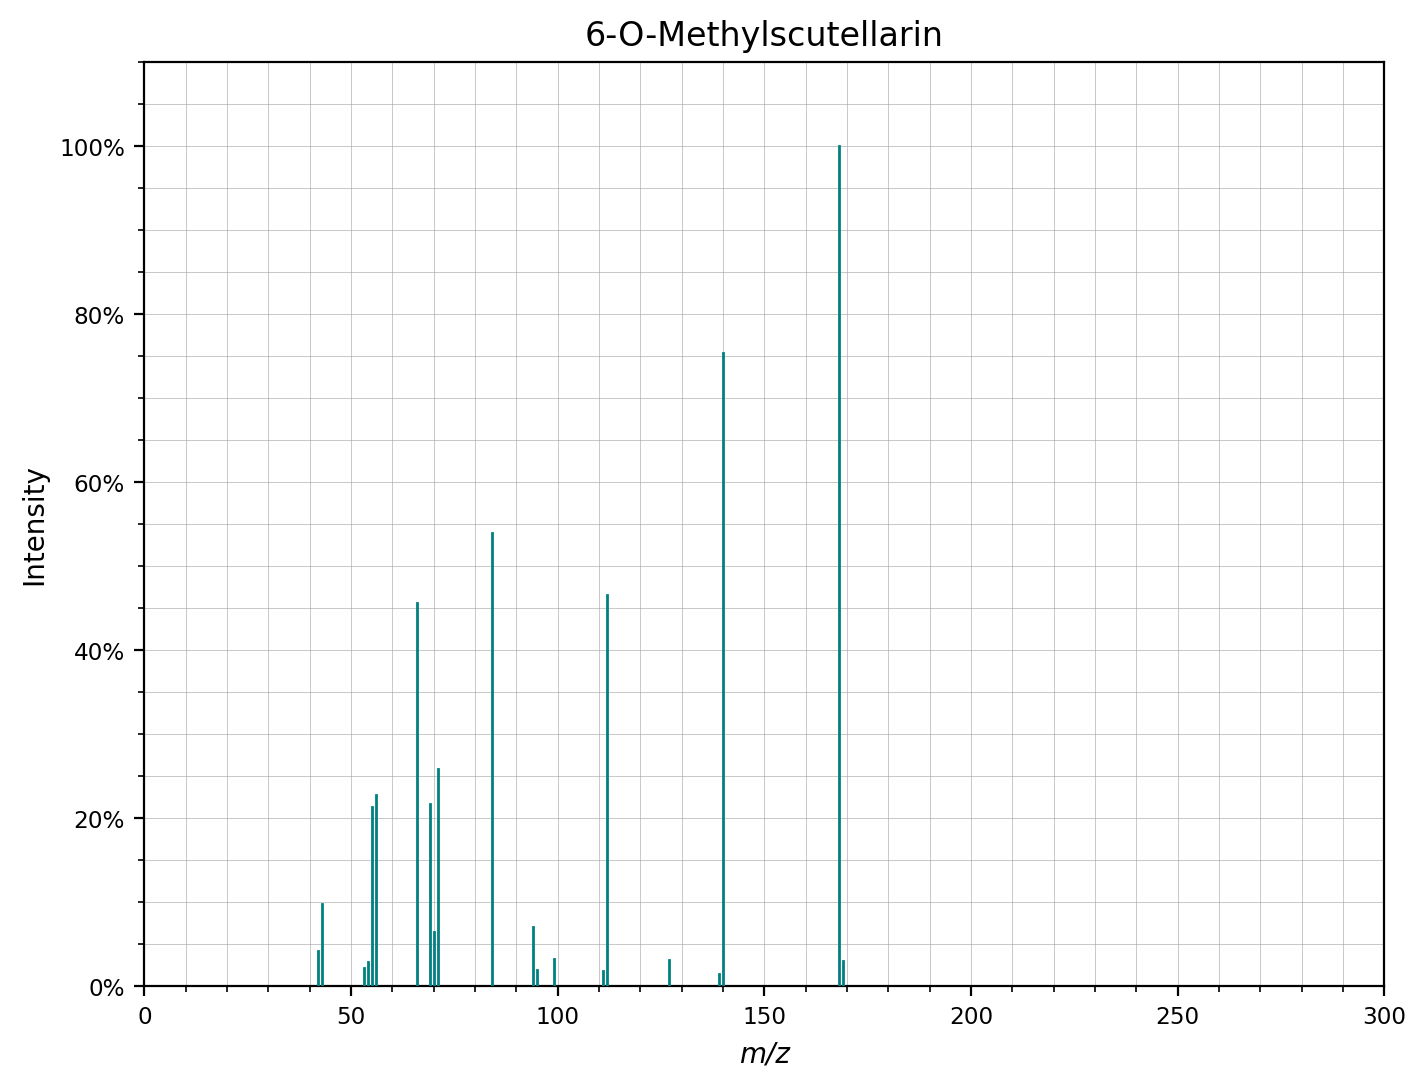

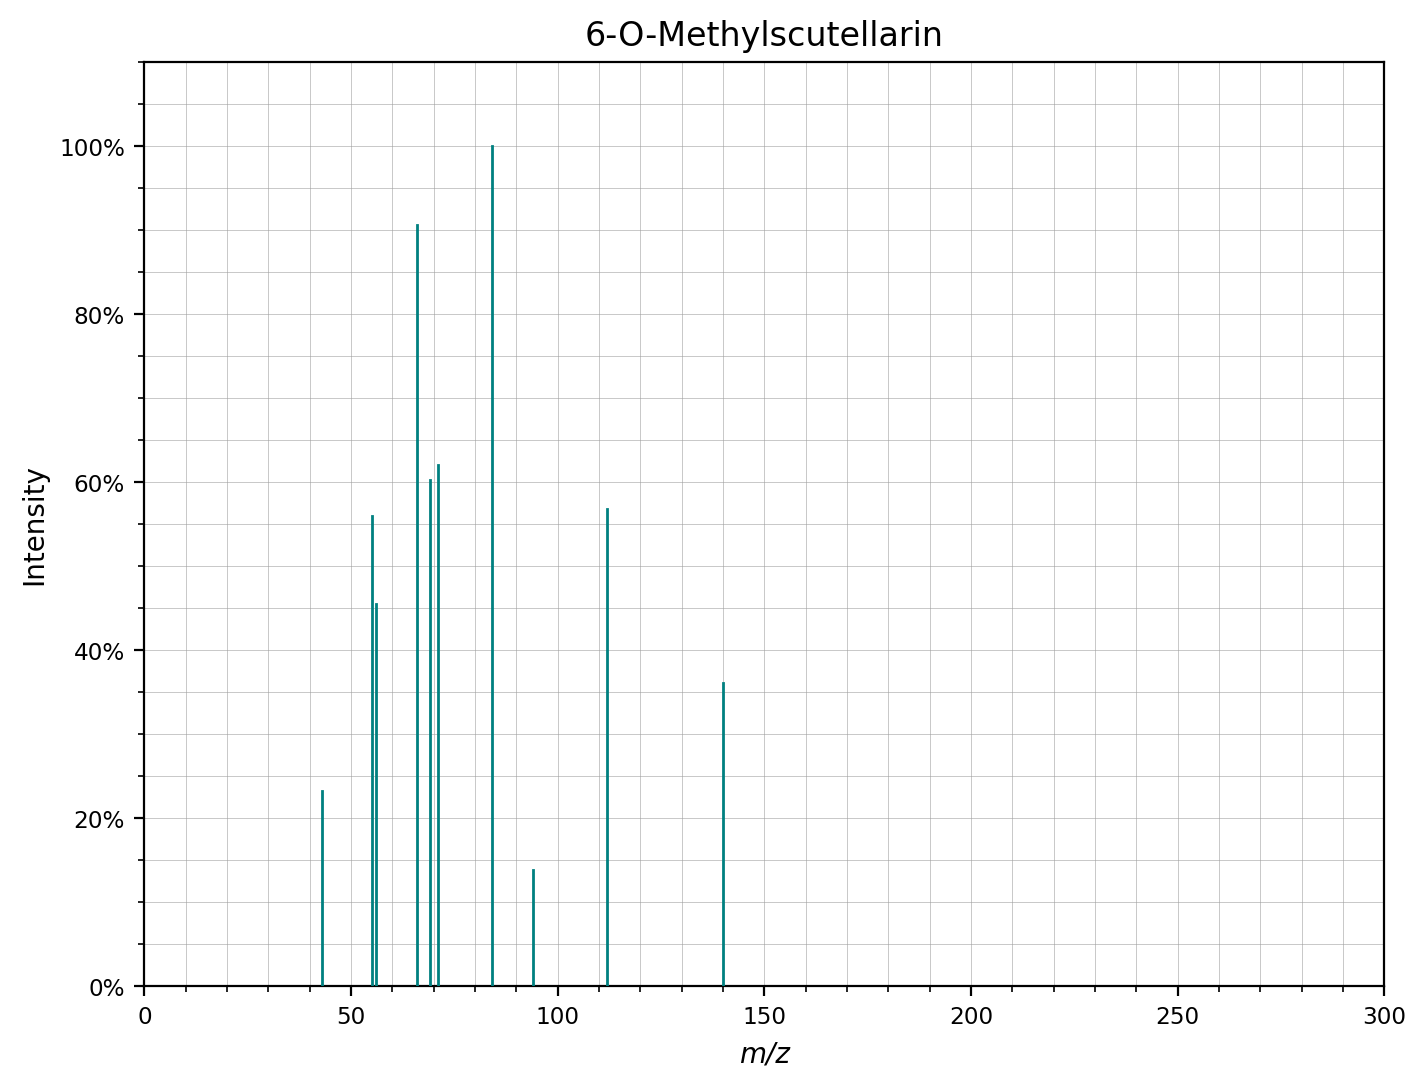

In [19]:
is_included = []
msn_spectra = np.array(msn_dataset.spectra)
for spec in msn_spectra:
    if "spectype" in spec.metadata and spec.metadata["spectype"] == "ALL_ENERGIES" and round(spec.metadata["precursor_mz"]) == 477:
        is_included.append(True)
    else:
        is_included.append(False)
msn_spectra_filtered = msn_spectra[is_included]

for spec in msn_spectra_filtered:
    ms_level = spec.metadata["ms_level"]
    print(ms_level)
    if ms_level != "2":
        print(spec.metadata["msn_precursor_mzs"])
    spec.plot()